# The numpy.random Package  ![Numpy Logo](  https://numpy.org/doc/stable/_static/numpylogo.svg)
***

## Setup

Firstly set up an environment by importing the required modules in order to examine this module and enable demonstrations of the concepts.
To see the cell below click on the three dots.

In [1]:
#import required modules for demonstration
import numpy as np                #python module that specializes in arrays and random numbers
import matplotlib.pyplot as plt   #module to visualize finding s in charts, plots, etc
import math                       #not sure if needed - check later
import seaborn as sns             #makes plots prettier sits on top of pyplot
from PIL import Image             #manipulate, resize and display images
from ipywidgets import interact_manual  #used to allow interaction with the cells in the notebook

%matplotlib inline

In [2]:
#function to resize images
def resize_deck(deck,size):
    #print(deck)
    resized =[]
    for suit in deck:
        #print(suit)
        for card in suit:
            #print(card)
            cardImage = "Images/"+ str(card.lower()).replace(" ","_")+".png"
            img = Image.open(cardImage)
            rsize = img.resize((np.array(img.size)/5).astype(int))
            arr = np.array(rsize)
            resized.append(arr)
    for i in range(13,size+13,13):
        #print(i-13,i)
        display(Image.fromarray(np.hstack(resized[i-13:i])))


In [3]:
#build a deck of cards
suitNames = ["Clubs","Diamonds","Hearts","Spades"]
card = [2,3,4,5,6,7,8,9,10,"Jack","Queen","King","Ace"]

deck = []
for s in suitNames:
    suit = []
    for c in card:
        suit.append(str(c) + " of " + s)
    deck.append(suit)
#take a copy

freshDeck = deck.copy()
#print(len(deck))

In [4]:
# Plot size.
plt.rcParams["figure.figsize"] = (20, 8)

# Pyplot style.
plt.style.use('seaborn')

## Overview
There are an abundance of tutorials, documentation , jupyter notebooks, etc on the numpy.random package available on the web( some of the best are mentioned in the resouces section of this notebook below).  
This is not an attempt at a tutorial or an in-depth discussion of any of the features of the package( which is best left to the experts), moreover it is a quick overview of what is available in the package, how to use it, brief explanations of their purpose, illustrations of their use and where to go for further information.
<br>   
Numpy.org documentation pages state that:  
*"Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions."*[2]
<br>   
What exactly does this mean? 
<br>   
Lets take a look at what random numbers, pseudo random numbers, bit generators, generators, sequences, sampling and statistical distributions are.
<br>   



***

### Random Numbers
#### Intro  
Random numbers are useful for a variety of purposes, such as generating data encryption keys, simulating and modeling complex phenomena and for selecting random samples from larger data sets. They have also been used aesthetically, for example in literature and music, and are of course ever popular for games and gambling. When discussing single numbers, a random number is one that is drawn from a set of possible values, each of which is equally probable, i.e., a uniform distribution. When discussing a sequence of random numbers, each number drawn must be statistically independent of the others.*--from random.org rephrase and cite*   

There are two main types of random numbers:
#### True random
A true random number is one that is generated by a physical phenonenom such as atmospheric noise or radio static, radioactive decay, lavalamp snapshots, which can be then fed into a computer to produce truly random sequences.

#### Pseudo random

A pseudo random number is one that has been generated by an algorithm on a computer and as such, because algorithms are stochastic processes i.e. the outcome is predictable, they are not true random numbers hence the term pseudo. Pseudo random numbers are not used in cryptography for this very reason, but are very usful when drawing samples from a probability ditribution in order to model or predict a real world event i.e. queuing times, mortality rates, covid cases.

### Generators

Generators are computer algorithms to produce pseudo random numbers. In the numpy package the routines use a combination of bit generator and generator to produce random samples. 

#### Bit generator
The bit generator is used to generate a sequence of 32 or 64 random bits. i.e. 10010111000010110100101010110001 - 32 bit sequence

#### Generator
The generator will use the bit generated sequences  to obtain a random sample from a number of statistical distributions such as normal, uniform, etc. Numpy random currently has over 30 different distributions in its library.

The numpy uses the PCG64 bit generator as its default, this is  "a 128-bit implementation of O’Neill’s permutation congruential generator"[3] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64

#### Seed the default random number generator
I will set up a random number generator using the default and seed it for use in this notebook. Seeding is explained below in more detail toward the end of this notebook. Here it allows us to generate the same set of random numbers throughout the noteboook each time it is used.

In [5]:
rng = np.random.default_rng(seed=1)

***

## “Simple random data” and “Permutations”
https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data
### Simple random data
#### Integers
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

This will draw random integers from a range of numbers(this functions draws them from the uniform distribution which is discussed below under distributions). For example a dice normally has with six faces with the dots on each face representing the numbers 1 to 6, if we were to generate a random number in the range one to six this would simulate a roll of the dice and if we were to do this 10 times we could simulate the outcome of 10 rolls of the dice.


In [6]:
interact_roll_dice=interact_manual.options(manual_name="Roll dice")
@interact_roll_dice

def roll_dice():
    #Roll the dice
    face = rng.integers(1,6,endpoint=True)
    print("The dice face is showing ",face)
    dice_face="Images/Alea_"+str(face)+".png"
    img = Image.open(dice_face)
    rsize = img.resize((np.array(img.size)/1).astype(int))
    display(rsize)

interactive(children=(Button(description='Roll dice', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

In [7]:
#Roll the dice ten times
rolls = rng.integers(1,6,size=10,endpoint=True)
print(rolls)

[3 4 5 6 1 1 5 6 2 2]


***   

#### Random
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

The Random routine will return random floating point numbers between 0 and 1 excluding the 1 ie. 0.5, 0.99999.

"Results are from the “continuous uniform” distribution over the stated interval." -- *from the docs link above*   

This can be useful as probabilites are usually expressed as floating point numbers in the range 0,1

***   

#### Choice
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
<br>   
Choice will return a random sample from a given array, to illustrate this I will use the deck of cards to return one card drawn randomly from the deck. In this example  the size parameter is none, however Choice can be used to return more than one item.

##### Draw a card from a deck of cards

In [8]:
interact_choose_card=interact_manual.options(manual_name="Choose card")
@interact_choose_card

def choose_card():
    #flatten the deck so all cards in all suits are available
    deck = np.array(freshDeck).flatten().tolist()
    #draw a card from the deck using Choice
    drawn = rng.choice(deck)
    #print(drawn)
    cardDrawn = "Images/"+ str(drawn.lower()).replace(" ","_")+".png"
    #image = img.imread(cardDrawn)
    #plt.axis("off")
    #plt.title=drawn
    #plt.imshow(image)
    #plt.show()
    #test
    img = Image.open(cardDrawn)
    rsize = img.resize((np.array(img.size)/5).astype(int))
    display(rsize)

interactive(children=(Button(description='Choose card', style=ButtonStyle()), Output()), _dom_classes=('widget…

##### Deal a hand from the deck
Choice can also be used to "deal" a hand from the deck, in order not to repeat a card in the sample the default parameter replace=True needs to be set to False. For illustration lets deal 5 cards from the deck.

In [9]:
interact_deal_hand=interact_manual.options(manual_name="Deal hand")
@interact_deal_hand
def deal_hand():
    #flatten the deck so all cards in all suits are available
    deck = np.array(freshDeck).flatten().tolist()
    hand = rng.choice(deck,5,replace=False)
    #print(hand)
    resize_deck(np.array(hand).reshape(1,5),5)

interactive(children=(Button(description='Deal hand', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

***   

#### Bytes
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

Returns random bytes and accepts size as a parameter.
These can be  used in security applications such as keys for the likes of handshakes,passwords,authentication.

In [10]:
returned = rng.bytes(10)
print("The generator for random bytes returned: ",returned)

The generator for random bytes returned:  b'Hpx\xdeE\x1f_l$m'


***   

### Permutations
#### shuffle
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

The function shuffle will randomly rearrange the elements in an array, much like as in when shuffling a deck of playing cards.
Lets set up a deck of cards to demonstrate.

In [11]:
interact_show_deck=interact_manual.options(manual_name="Show Deck")
@interact_show_deck

def show_deck():

    #resize the images for display purposes and output to screen

    resize_deck(np.array(deck).reshape(4,13),52)

interactive(children=(Button(description='Show Deck', style=ButtonStyle()), Output()), _dom_classes=('widget-i…

#### "Shuffle the Deck"

In [12]:
interact_shuffle_deck=interact_manual.options(manual_name="Shuffle Deck")
@interact_shuffle_deck
def shuffle_deck():
    #flatten it to a list so all cards are "shuffled" ignoring axes
    deck = np.array(freshDeck).flatten().tolist()
    rng.shuffle(deck)

    #resize expects a 4x13 array so reshape it prior to passing it in
    resize_deck(np.array(deck).reshape(4,13),52)
    #print(Deck)

interactive(children=(Button(description='Shuffle Deck', style=ButtonStyle()), Output()), _dom_classes=('widge…

***   

#### permutation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

similar to shuffle this will permutate the elements in a given array or an array passed to it   
as an example pass a suit from the deck of cards

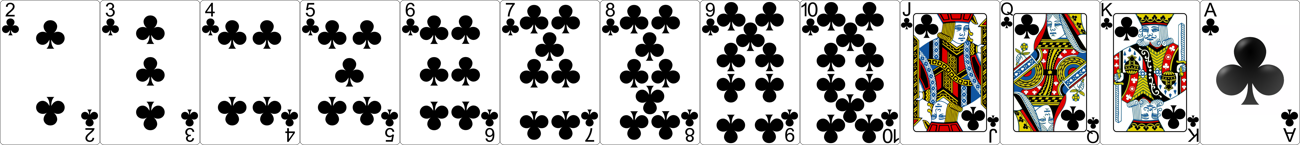

In [13]:
#take a slice of the original deck
suit = np.array(freshDeck[0]).reshape(1,13)
resize_deck(suit,13)

pass the suit to the permutation function and resize it for display purposes

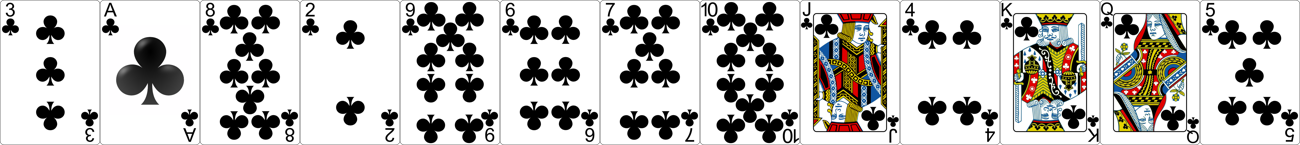

In [14]:
resize_deck(rng.permutation(suit,axis=1),13)

***   

#### permuted
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted

Similar to both shuffle and permutation this allows granularity on permuting or shuffling elements of an array along a chosen axis. It allows a copy to be taken or can be done in-place.   
Lets rearrange the Deck to represent the four suits as arrays of single suits within the deck.


In [15]:
newDeck = np.array(freshDeck).reshape(4,13)
#print(newDeck)
#resize_deck(newDeck,52)

now lets rearrange the new deck so that the elements in each suit are no longer ranked by order of the card within suit

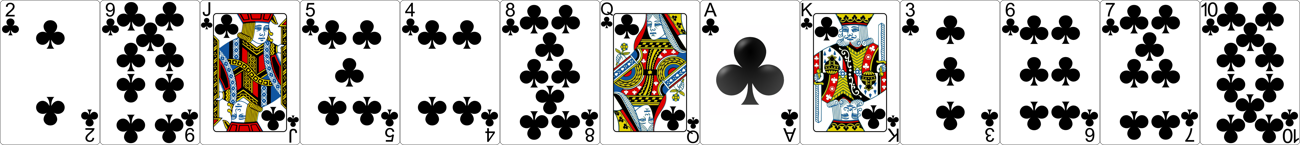

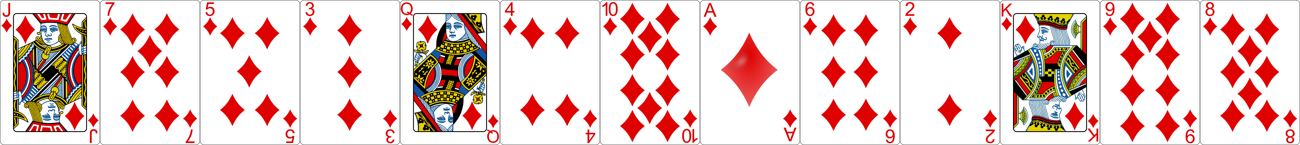

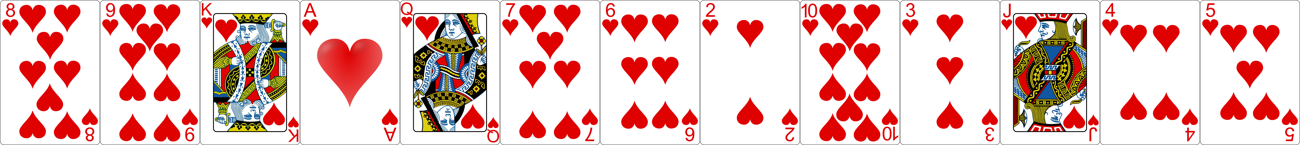

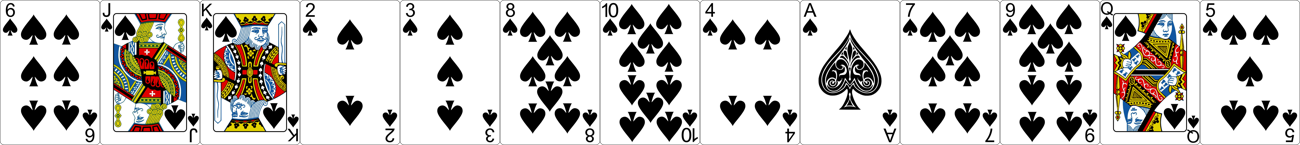

In [16]:
out = rng.permuted(newDeck,axis=1)
#print(out)
resize_deck(out,52)

***   

## Distributions
*need to pull in the research on this*   

what is a statistical distribution
"A distribution is simply a collection of data, or scores, on a variable. Usually, these scores are arranged in order from smallest to largest and then they can be presented graphically." Page 6, Statistics in Plain English, Third Edition, 2010.
 

Explain use and purpose of five of these
Possibles - Uniform, Triangular, Binomial, Normal, Pareto

### Uniform
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

A  uniform distribution is applicable where the probabilities of possible outcomes are similar to each other. In the case of rolling a dice the odds of getting a number between one and six are 1:6 or 1/6 or one in six or .1667 and this hold true for each number number on the dice.

 |Number|Probability|
 |-|-|
 |1|.1667|
 |2|.1667|
 |3|.1667|
 |4|.1667|
 |5|.1667|
 |6|.1667|   
 

<br>
 To demonstrate I will set up a "handmade" trial and then use the numpy uniform routine and compare.

##### Handmade trial
Setting up a handmade trial where a dice is rolled multiple times and the outcomes recorded. I am not rolling a phyical dice and recording the outcomes but will use the random integers function to simulate multiple rolls. I will the compare the outcome to a trial where the numbers are generated by the uniform distribution function and compare the graphs. They should be similar as the integer distribution function also uses a uniform distribution. They should both(handmade and uniform) produce a rectangular looking plot with the peaks of the bins or bars near the expected probabilities. The expected probabilities are shown as a red line on the plots. 

In [17]:
#set up a dice
dice=[1,2,3,4,5,6]
#set a variable for multiple rolls
no_rolls = 1000

##### Run a trial with a 1000 rolls of the dice

In [18]:
rolls = rng.integers(1,6,size=no_rolls,endpoint=True)

Get the numbers that came up and count how many times they appeared in the trial

In [19]:
values,counts = np.unique(rolls,return_counts=True)

In [20]:
print(f"The numbers:{values} appeared {counts} times respectively in the trial")

The numbers:[1 2 3 4 5 6] appeared [170 154 184 154 174 164] times respectively in the trial


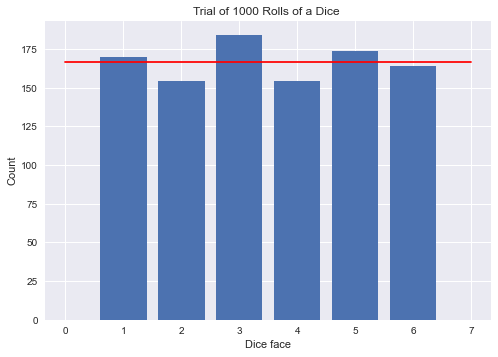

In [21]:
plt.ylabel("Count")
plt.xlabel("Dice face")
plt.title("Trial of 1000 Rolls of a Dice ")
plt.bar(values,counts)
probabilities=np.full(8,.1667*no_rolls)
plt.plot(probabilities,color="r")
plt.show()

From the plot above we can see that the counts of the numbers drawn are nearing the expected probabilities, and that the shape is approaching a rectangular uniform shape

##### Repeat the trial using numbers drawn from the uniform distribution

In [22]:
rolls= rng.uniform(1,7,no_rolls)

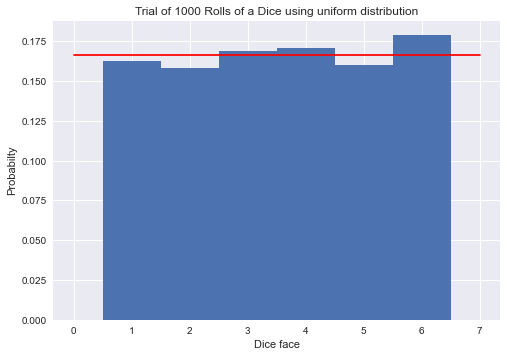

In [23]:
plt.ylabel("Probabilty")
plt.xlabel("Dice face")
plt.title("Trial of 1000 Rolls of a Dice using uniform distribution")
plt.hist(rolls,bins=[1,2,3,4,5,6,7],density=True,align="left")
probabilities=np.full(8,.1667)
plt.plot(probabilities,color="r")
plt.show()

Again we can see a rectagular shape emerging whose height is approaching the expected probabilites for a uniform distribution of the faces of the dice. 
<br>   
The more rolls we sample the closer the bars get to the expected probability for each face of the dice. So increasing the number of trials(rolls) should see the flattening of the tops of the histogram bars around the expected probalities.
<br>
##### Run the trial 100,000 times

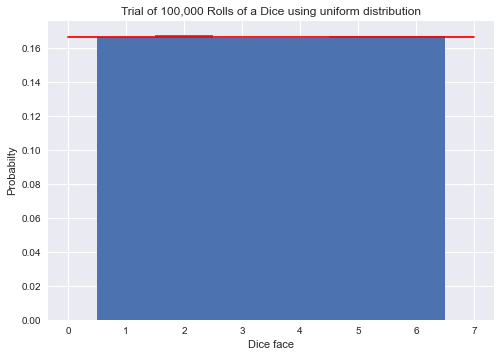

In [24]:
plt.ylabel("Probabilty")
plt.xlabel("Dice face")
plt.title("Trial of 100,000 Rolls of a Dice using uniform distribution")
rolls = rng.uniform(1,7,no_rolls*100)
plt.hist(rolls,bins=[1,2,3,4,5,6,7],align='left',density=True)
plt.plot(probabilities,color="r")
plt.show()

##### Conclusion: 
The uniform distribution function in numpy.random pulls samples from a uniform distribution and there's no getting away from a one in six chance of your number coming up when rolling a dice!

***   

### Triangular
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.triangular.html#numpy.random.Generator.triangular 
<br>  
A triangular ditribution is based on a minimum value, a maximum value and the mode of those values , it can be used to obtain the probability for a value occurring given a value between the min and the max.

The sum of two dice will give the range 2 to 12   
there are 36 possible outcomes 6*6   
with probabilities 0.027777778, 0.055555556, 0.083333333, 0.111111111, 0.138888889, 0.166666667, 0.138888889, 0.111111111, 0.083333333, 0.055555556, 0.027777778

 |Sum 2 Dice|#Ways|Odds|Probability|
 |-|-|-|-|
 |2|1|1/36|.0277|
 |3|2|1/18|.0555|
 |4|3|1/12|.0833|
 |5|4|1/9|.1111|
 |6|5|5/32|.1388|  
 |7|6|1/6|.1667|
 |8|5|5/32|.1388|
 |9|4|1/9|.1111|
 |10|3|1/12|.0833|
 |11|2|1/18|.0555|
 |12|1|1/36|.1667|  

In [25]:
values = [2,3,4,5,6,7,8,9,10,11,12]
probs = [0.027777778,0.055555556,0.083333333,0.111111111,0.138888889,0.166666667,0.138888889,0.111111111,0.083333333,0.055555556,0.027777778]

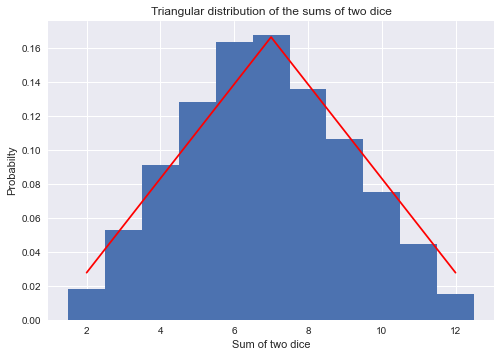

In [26]:
twoDice = rng.triangular(2,7,13,no_rolls*100)
plt.ylabel("Probabilty")
plt.xlabel("Sum of two dice")
plt.title("Triangular distribution of the sums of two dice")
plt.hist(twoDice,bins=[2,3,4,5,6,7,8,9,10,11,12,13],density=True,align='left')
plt.plot(values,probs,color="r")
plt.show()

***   

### Binomial
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

A binomial distribution is the distribution of the outcomes from a number of tests where there are only two outcomes for the individual test i.e. heads or tails when flipping a coin, when there are two or more possible outcomes as in a roll of a dice , we can state this as "a number say five comes up" or "it does not come up(another number appears)" - this equates to  appears=1/6 and other number = 5/6 for the individual test.
<br>   
The parameters for the binomial routine are (n,p,size)   
where n is the number of trials, p is the probability of the outcome and size is the number of tests
<br>   
This can be used to obtain the probabilities of an event occuring during repeated trials of an experiment, for example if we want to see how often a number might come up in ten rolls of a dice we can draw samples from this distribution. What are the chances that a one will appear twice in ten rolls of a dice.(This can be used for any number on the dice it is not restricted to the number one).

The probabilty of getting a ONE,TWO,THREE,FOUR,FIVE OR SIX on a roll of a dice is one in six or 16.6%

In this case n=10, p=.166


In [27]:
test = rng.binomial(10, 0.166,10000)

In [28]:
for i in range(test.min(),test.max()+1):
    print(i,sum(test == i)/test.size)

0 0.1671
1 0.3227
2 0.2906
3 0.1476
4 0.0548
5 0.0149
6 0.0022
7 0.0001


In [29]:
values,counts = np.unique(test,return_counts=True)
print(values,counts)

[0 1 2 3 4 5 6 7] [1671 3227 2906 1476  548  149   22    1]


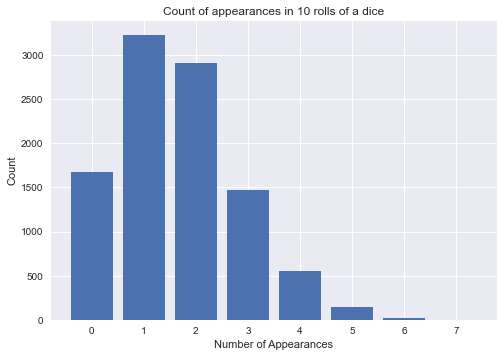

In [30]:
plt.ylabel("Count")
plt.xlabel("Number of Appearances")
plt.title("Count of appearances in 10 rolls of a dice")
plt.bar(values,counts)
plt.show()

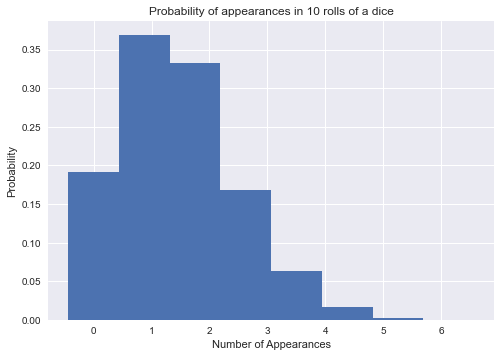

In [31]:
plt.ylabel("Probability")
plt.xlabel("Number of Appearances")
plt.title("Probability of appearances in 10 rolls of a dice")
plt.hist(test,density=True,bins=8,align="left")
plt.show()

##### Interpreting the results
If we ask the question "what are the chances of the number two appearing when a dice is rolled ten times?" we can get the answer from the above graph, whereby we can extrapolate that there is a 16% chance that it will not come up at all, a 32% chance of it coming up once, a 28% chance it will appear twice, 15% chance of it appearing three times, a 5% chance of it coming up four times, a 1% chance of it appearing five times, 0.2% chance of six times and a 0.03% chance of seven times.

***  

### Normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal
<br>   
The normal distribution is probably the most used distribution in statistics, "Six sigma" for example, a methodology for business process improvement, uses it extensively.    
It has a bell shaped curve appearance and has certain properties relating to area under the curve.
95% of the values , 98% blah blah - *refresh your memory on this*


### Three dice

To demonstate its use I will firstly set up a trial based on the sums of three dice rolled, this will be a "manual" trial which i will then compare with the sample pulled from the noramal distribution.
We can get between 3 and 18 for the sum of a roll of three dice.
 
*Add probability table here* 


In [32]:
possibilities = list(range(3,19))

In [33]:
print(possibilities)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [34]:
probabilities = [0.00462963,0.013888889,0.027777778,0.046296296,0.069444444,0.097222222,0.115740741,0.125,0.125,0.115740741,0.097222222,0.069444444,0.046296296,0.027777778,0.013888889,0.00462963]

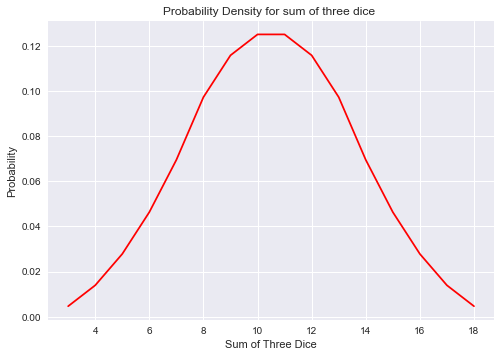

In [35]:
plt.ylabel("Probability")
plt.xlabel("Sum of Three Dice")
plt.title("Probability Density for sum of three dice ")
plt.plot(possibilities,probabilities,color="r")
plt.show()

##### Experiment with handmade "observations"

In [36]:
theDice = [1,2,3,4,5,6]
rng.choice(theDice,1)

array([3])

In [37]:
#roll the three dice ten thousand times
no_throws = 10000
no_of_dice = 3
outcomes = []
for throw in range(no_throws):
    sum_dice = 0
    for dice in range(no_of_dice):
        sum_dice += rng.choice(theDice,1)
    outcomes.append(sum_dice)
outcomes = np.array(outcomes)

In [38]:
print("Mean ",outcomes.mean())
print("Min  ",outcomes.min())
print("Max  ",outcomes.max())
print("sDev ",outcomes.std())

Mean  10.4981
Min   3
Max   18
sDev  2.9506603311801243


In [39]:
#plot the above
#print(possibilities)
bins = possibilities.copy()
#print(bins)
#Adding  one extra to the bins here to account for right side exclusion in hist function for bins
bins.append(19)
#print(bins)

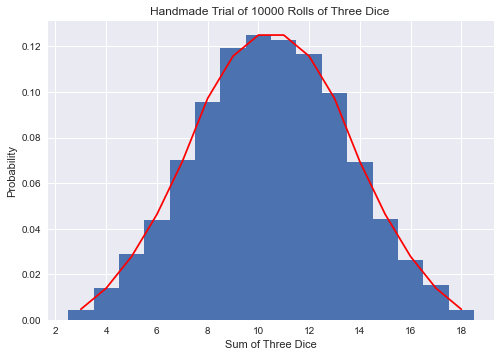

In [40]:
plt.ylabel("Probability")
plt.xlabel("Sum of Three Dice")
plt.title("Handmade Trial of 10000 Rolls of Three Dice ")
plt.hist(outcomes,bins=bins,density=True,align='left')
plt.plot(possibilities,probabilities,color="r")
plt.show()

##### Look at normal distribution using the mean and std dev obtained from  the "observed"

In [41]:
mu = outcomes.mean()
sigma = outcomes.std()

threeDice=rng.normal(mu,sigma,10000)


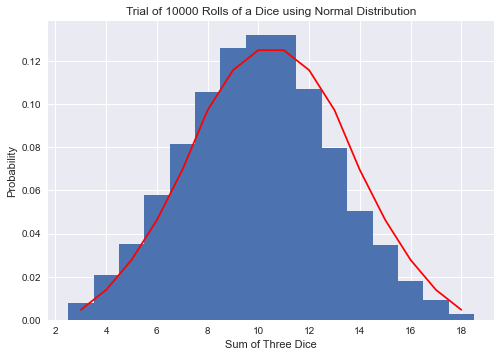

In [42]:
plt.ylabel("Probability")
plt.xlabel("Sum of Three Dice")
plt.title("Trial of 10000 Rolls of a Dice using Normal Distribution")
plt.hist(threeDice,bins=bins,density=True,align='left')
plt.plot(possibilities,probabilities,color="r")
plt.show()

Rolling dice is a discrete distribution, while the normal distribution, AKA the Gaussian distribution, is continuous by definition. The distribution is technically binomial, which approximates the normal distribution as n gets large.
https://math.stackexchange.com/questions/1482813/is-rolling-a-dice-a-gauss-distribution

***   

### Pareto
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html#numpy.random.Generator.pareto

The 80/20 principle

The Pareto distribution, named after the Italian economist Vilfredo Pareto, is a power law probability distribution useful in many real world problems. Outside the field of economics it is generally referred to as the Bradford distribution. Pareto developed the distribution to describe the distribution of wealth in an economy. It has also found use in insurance, web page access statistics, oil field sizes, and many other problems, including the download frequency for projects in Sourceforge [1]. It is one of the so-called “fat-tailed” distributions. *from the docs rephrase and cite*

The Lomax or Pareto II distribution is a shifted Pareto distribution. The classical Pareto distribution can be obtained from the Lomax distribution by adding 1 and multiplying by the scale parameter m (see Notes). *also from docs*

*figure out shape, mode & fit and usage for a better example*

In [43]:
a, m = 3., 2.  # shape and mode
s = (rng.pareto(a, 1000) + 1) * m


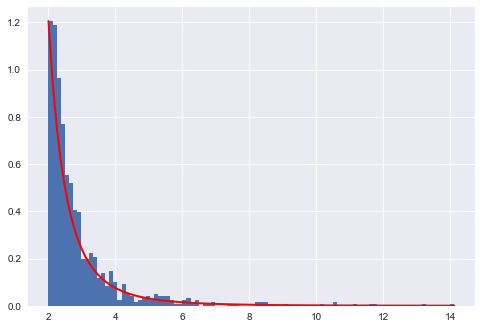

In [44]:
count, bins, _ = plt.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
#print(fit)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

***   

## Seeds
##### - The use of seeds in generating pseudorandom numbers.
A seed is a number or an array used to initiialize a pseudo random number generator. Once initialized the sequence of random numbers generated can be repeated by reinitializing the generator with the same seed. This is useful when analysing samples obtained from statistical distributions in order to be able to make the analysis repeatable with the same data set. The seed itself does not need to be random and can be picked manually or obtained from the state of the computer system such as the time from the system clock or hardware generated i.e true random number generator(aka TRNG discussed above) or from a cryptographically secure random number generator, i.e one that is suitable for cryptography, aka CRNG.
<br>   
The choice of seed is critical in the field of computer security where encryption keys are used to secure data, allow sharing of critical data by sharing keys, prevent cyber attacks, user or machine authorisation and the like. As stated above once a seed is known by one or more parties they can generate the same sequences to "match" each other.


***  

## References

https://numpy.org/doc/stable/reference/random/generator.html   
[2] https://numpy.org/doc/stable/reference/random/index.html?highlight=random#quick-start

## Resources

https://www.random.org/randomness/

https://en.wikipedia.org/wiki/Randomness


https://code.google.com/archive/p/vector-playing-cards/downloads
<!---
![2_of_clubs](images/2_of_clubs.svg)
--->
<img src=images/2_of_clubs.svg width=72 height=96)>


## End